In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas.plotting import table

In [3]:
#pip install SQLAlchemy

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect # Decided to use inspect, too


In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model -- #used autoload_with instead
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
# This returns a list of the tables in the database
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
# Stores the base(s) as an object reference
Station = Base.classes.station

Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set. ## I just returned the biggest date from the date column
max_date = session.query(func.max(Measurement.date)).first()
max_date

('2017-08-23',)

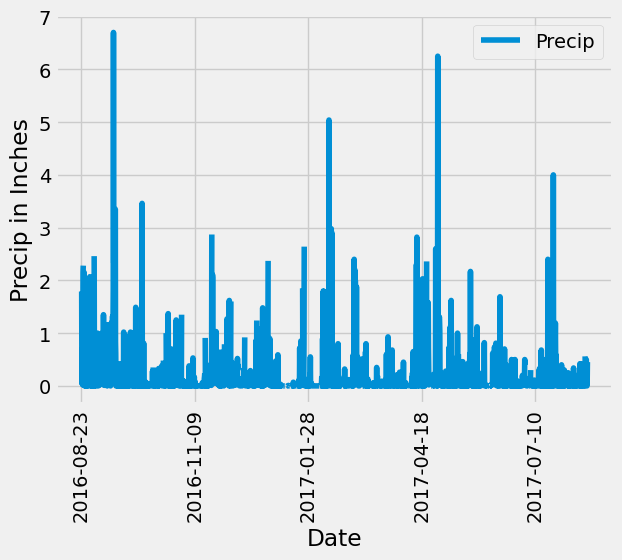

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last12 = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
last12_q = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last12).all()

# Save the query results as a Pandas DataFrame. **Explicitly set the column names
last12DF = pd.DataFrame(last12_q, columns=["Date", "Precip"])
#last12DF

# Sort the dataframe by date
last12DF = last12DF.sort_values("Date")
#last12DF

# Use Pandas Plotting with Matplotlib to plot the data  #adding ylabel in the .plot makes it go weird??
last12DF.plot(x="Date", y="Precip", rot=90)
plt.ylabel("Precip in Inches")
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
last12DF.describe()

,Precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
           filter(Measurement.station == "USC00519281").all()                                

[(54.0, 54.0, 71.66378066378067)]

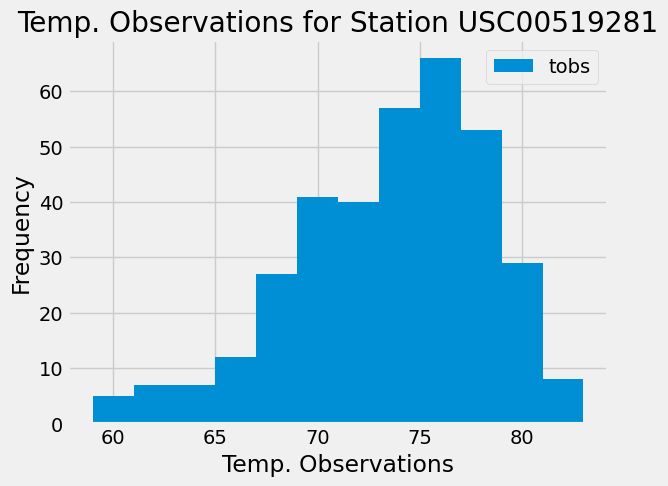

In [16]:
# Using the most active station id #USC00519281 #last12DF
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_tobs = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").\
filter(Measurement.date >= last12).all()
#temp_tobs

temp_tobsDF = pd.DataFrame(temp_tobs)
temp_tobsDF

temp_tobsDF.plot.hist(bins=12, title="Temp. Observations for Station USC00519281")
plt.tight_layout()
plt.xlabel("Temp. Observations")
plt.show()

# Close Session

In [17]:
# Close Session
session.close()